# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [15]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis  
- Load in the cleaned data

In [16]:
df = pd.read_csv("aviation_cleaned.csv")

df.shape
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Occupants,Destroyed.Flag,Make.and.Model,Aircraft.Size
0,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES INTL,Incident,MINOR,Airplane,9VSQQ,BOEING,747,No,4.0,TURBOFAN,Part 129: Foreign,SCHD,NaN,"Singapore Airlines, Ltd.",0.0,0.0,0.0,588.0,VMC,TAXI,Probable Cause,04-12-2014,588.0,0,BOEING 747,Large
1,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,NaN,NaN,Fatal(1),DESTROYED,Airplane,N9600W,PIPER,PA-28-140,No,1.0,RECIPROCATING,Part 91: General Aviation,NaN,PERSONAL,NaN,1.0,1.0,0.0,0.0,IMC,CRUISE,Probable Cause,02-05-2011,2.0,1,PIPER PA-28-140,Small
2,20001214X45013,Incident,CHI84IA041,1983-11-08,"CHICAGO, IL",United States,NaN,NaN,ORD,O'HARE,Incident,MINOR,Airplane,N898AA,BOEING,727-200,No,3.0,TURBOFAN,Part 121: Air Carrier,SCHD,NaN,NaN,0.0,0.0,0.0,100.0,VMC,TAXI,Probable Cause,11-06-2018,100.0,0,BOEING 727-200,Large
3,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,NaN,NaN,NaN,NaN,Non-Fatal,SUBSTANTIAL,Airplane,N1882D,BEECH,C35,No,1.0,RECIPROCATING,Part 91: General Aviation,NaN,PERSONAL,NaN,0.0,0.0,0.0,1.0,VMC,CLIMB,Probable Cause,05-05-2011,1.0,0,BEECH C35,Small
4,20001214X45339,Accident,LAX84LA110,1983-12-22,"SANTA ROSA ISLAND, CA",United States,NaN,NaN,NaN,PRIVATE,Non-Fatal,SUBSTANTIAL,Airplane,N2697K,CESSNA,180K,No,1.0,RECIPROCATING,Part 91: General Aviation,NaN,PERSONAL,NaN,0.0,0.0,0.0,1.0,VMC,TAKEOFF,Probable Cause,01-02-2016,1.0,0,CESSNA 180K,Small


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [17]:

df["Aircraft.Size"].value_counts()

aircraft_summary = (df.groupby(["Aircraft.Size", "Make.and.Model"])
    .agg(
        accidents=("Destroyed.Flag", "count"),
        destroy_rate=("Destroyed.Flag", "mean"),
        avg_fatal_rate=("Total.Fatal.Injuries", "mean"),
        avg_serious_rate=("Total.Serious.Injuries", "mean")
    )
    .reset_index()
)

aircraft_summary

small_aircraft = aircraft_summary[aircraft_summary["Aircraft.Size"] == "Small"].sort_values(
    ["destroy_rate", "avg_serious_rate", "avg_fatal_rate"]
)

large_aircraft = aircraft_summary[aircraft_summary["Aircraft.Size"] == "Large"].sort_values(
    ["destroy_rate", "avg_serious_rate", "avg_fatal_rate"]
)

print(large_aircraft)
print(small_aircraft)

   Aircraft.Size             Make.and.Model  accidents  destroy_rate  \
1          Large            AIRBUS A319-114          2           0.0   
3          Large            AIRBUS A320 211          2           0.0   
8          Large            AIRBUS A321 231          3           0.0   
9          Large           AIRBUS A321-271N          2           0.0   
11         Large                AIRBUS A380          2           0.0   
..           ...                        ...        ...           ...   
27         Large             BOEING 737-800          2           0.5   
49         Large               BOEING MD-82          2           0.5   
64         Large  MCDONNELL DOUGLAS DC-9-51          2           0.5   
51         Large     DE HAVILLAND DHC-6-200          2           0.5   
43         Large           BOEING 777 - 206          2           1.0   

    avg_fatal_rate  avg_serious_rate  
1              0.0               0.0  
3              0.0               0.0  
8              0.0

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

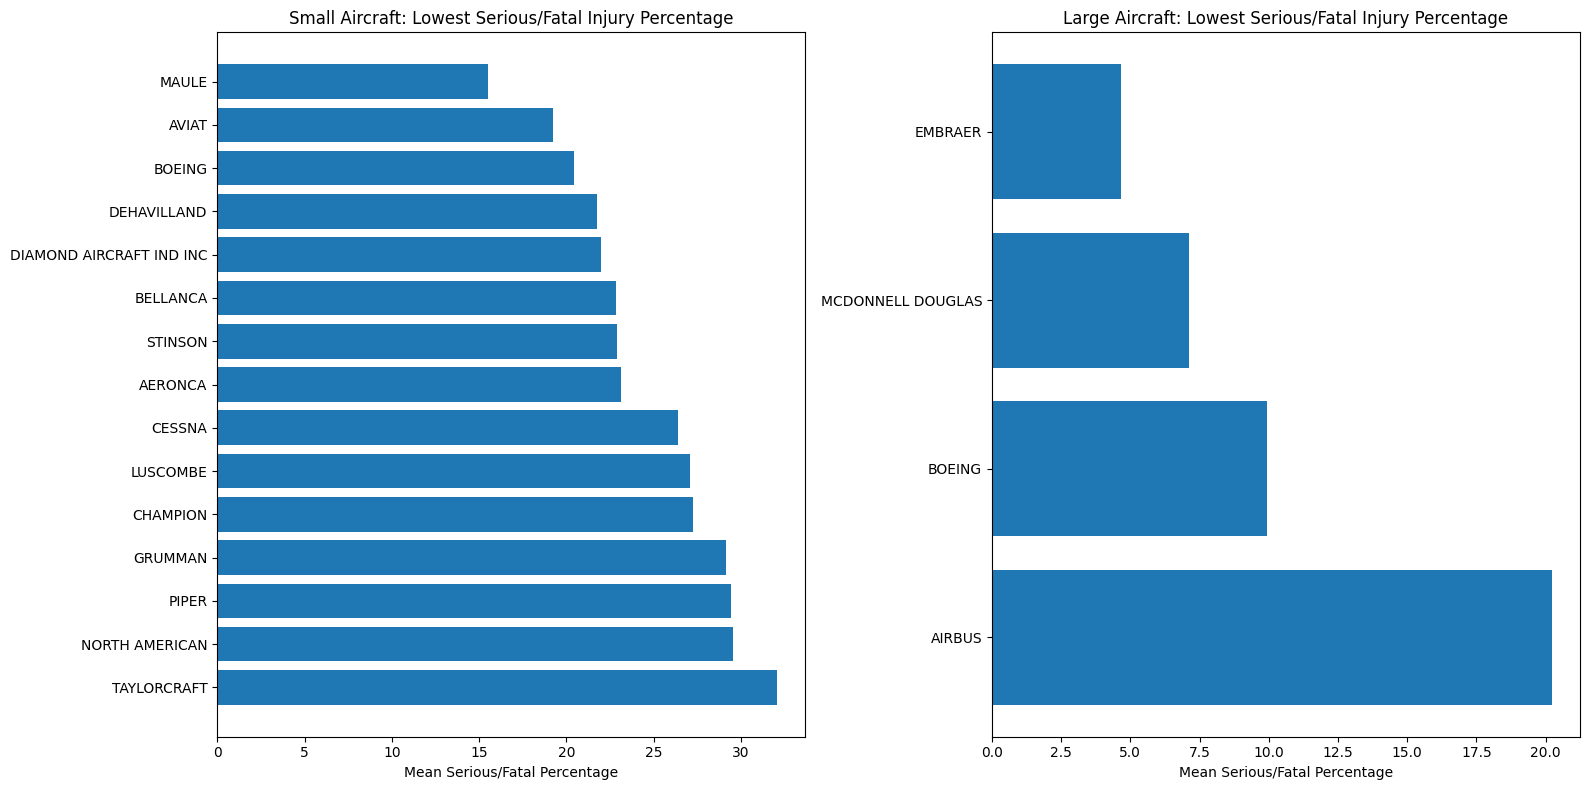

In [18]:
df["Serious.Fatal.Count"] = (
    df["Total.Fatal.Injuries"] +
    df["Total.Serious.Injuries"]
)

df["Serious.Fatal.Rate"] = (
    df["Serious.Fatal.Count"] /
    df["Total.Occupants"]
)

make_summary = (
    df.groupby(["Aircraft.Size", "Make"])
      .agg(
          Accidents=("Serious.Fatal.Rate", "count"),
          Mean_SeriousFatal_Rate=("Serious.Fatal.Rate", "mean")
      )
      .reset_index()
)

small_makes = make_summary[
    (make_summary["Aircraft.Size"] == "Small") &
    (make_summary["Accidents"] >= 50)
]

large_makes = make_summary[
    (make_summary["Aircraft.Size"] == "Large") &
    (make_summary["Accidents"] >= 10)
]

top_small = small_makes.nsmallest(
    15, "Mean_SeriousFatal_Rate"
)

top_large = large_makes.nsmallest(
    15, "Mean_SeriousFatal_Rate"
)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Small aircraft
axes[0].barh(
    top_small["Make"],
    top_small["Mean_SeriousFatal_Rate"]  * 100
)
axes[0].set_title("Small Aircraft: Lowest Serious/Fatal Injury Percentage")
axes[0].invert_yaxis()
axes[0].set_xlabel("Mean Serious/Fatal Percentage")

# Large aircraft
axes[1].barh(
    top_large["Make"],
    top_large["Mean_SeriousFatal_Rate"] * 100
)
axes[1].set_title("Large Aircraft: Lowest Serious/Fatal Injury Percentage")
axes[1].invert_yaxis()
axes[1].set_xlabel("Mean Serious/Fatal Percentage")

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/lv/pl550ttn68x2d4_h9mk9y7pc0000gn/T/ipykernel_53495/2147630996.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


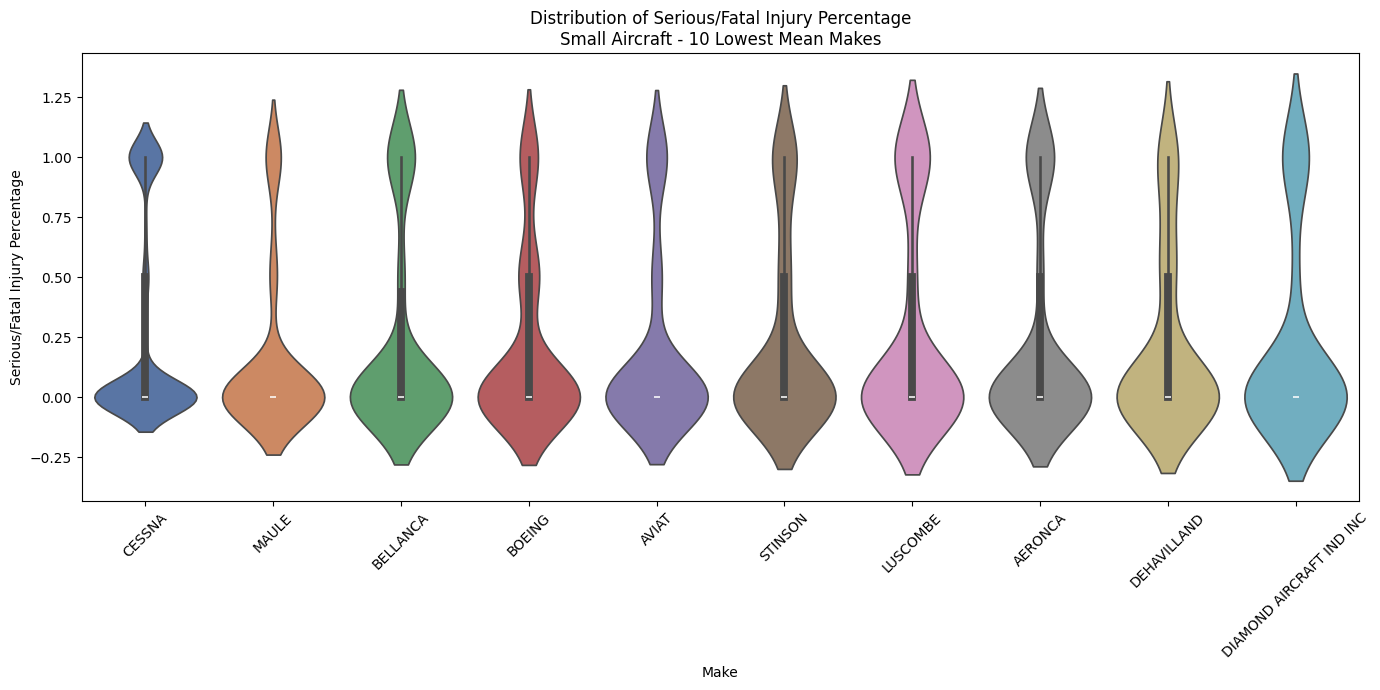

In [19]:
top10_small_makes = top_small.nsmallest(
    10, "Mean_SeriousFatal_Rate"
)["Make"]

plot_df = df[
    (df["Aircraft.Size"] == "Small") &
    (df["Make"].isin(top10_small_makes))
].copy()

plt.figure(figsize=(14, 7))

sns.violinplot(
    data=plot_df,
    x="Make",
    y=plot_df["Serious.Fatal.Rate"],
    palette="deep",
)

plt.xticks(rotation=45)
plt.ylabel("Serious/Fatal Injury Percentage")
plt.title("Distribution of Serious/Fatal Injury Percentage\nSmall Aircraft - 10 Lowest Mean Makes")

plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

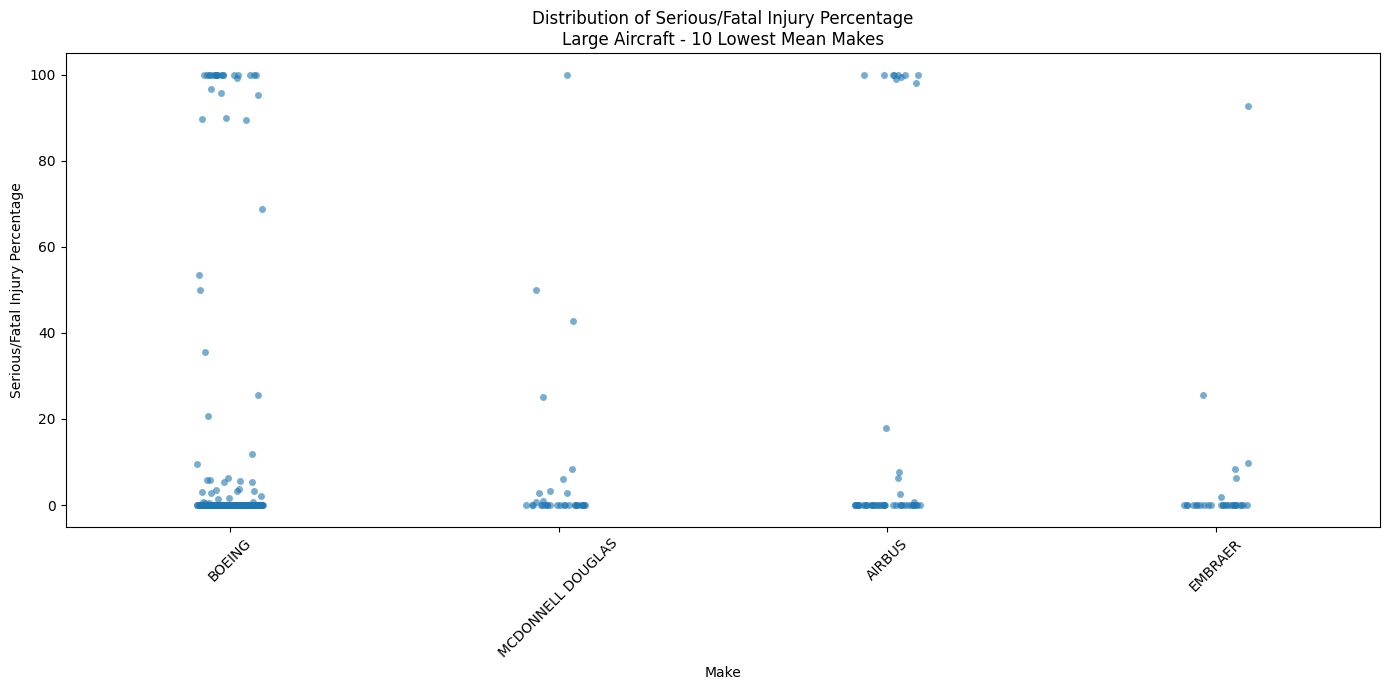

In [20]:
top10_large_makes = top_large.nsmallest(
    10, "Mean_SeriousFatal_Rate"
)["Make"]

plot_df_large = df[
    (df["Aircraft.Size"] == "Large") &
    (df["Make"].isin(top10_large_makes))
].copy()

plt.figure(figsize=(14, 7))

sns.stripplot(
    data=plot_df_large,
    x="Make",
    y=plot_df_large["Serious.Fatal.Rate"] * 100,
    jitter=True,
    alpha=0.6,
)

plt.xticks(rotation=45)
plt.ylabel("Serious/Fatal Injury Percentage")
plt.title("Distribution of Serious/Fatal Injury Percentage\nLarge Aircraft - 10 Lowest Mean Makes")

plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

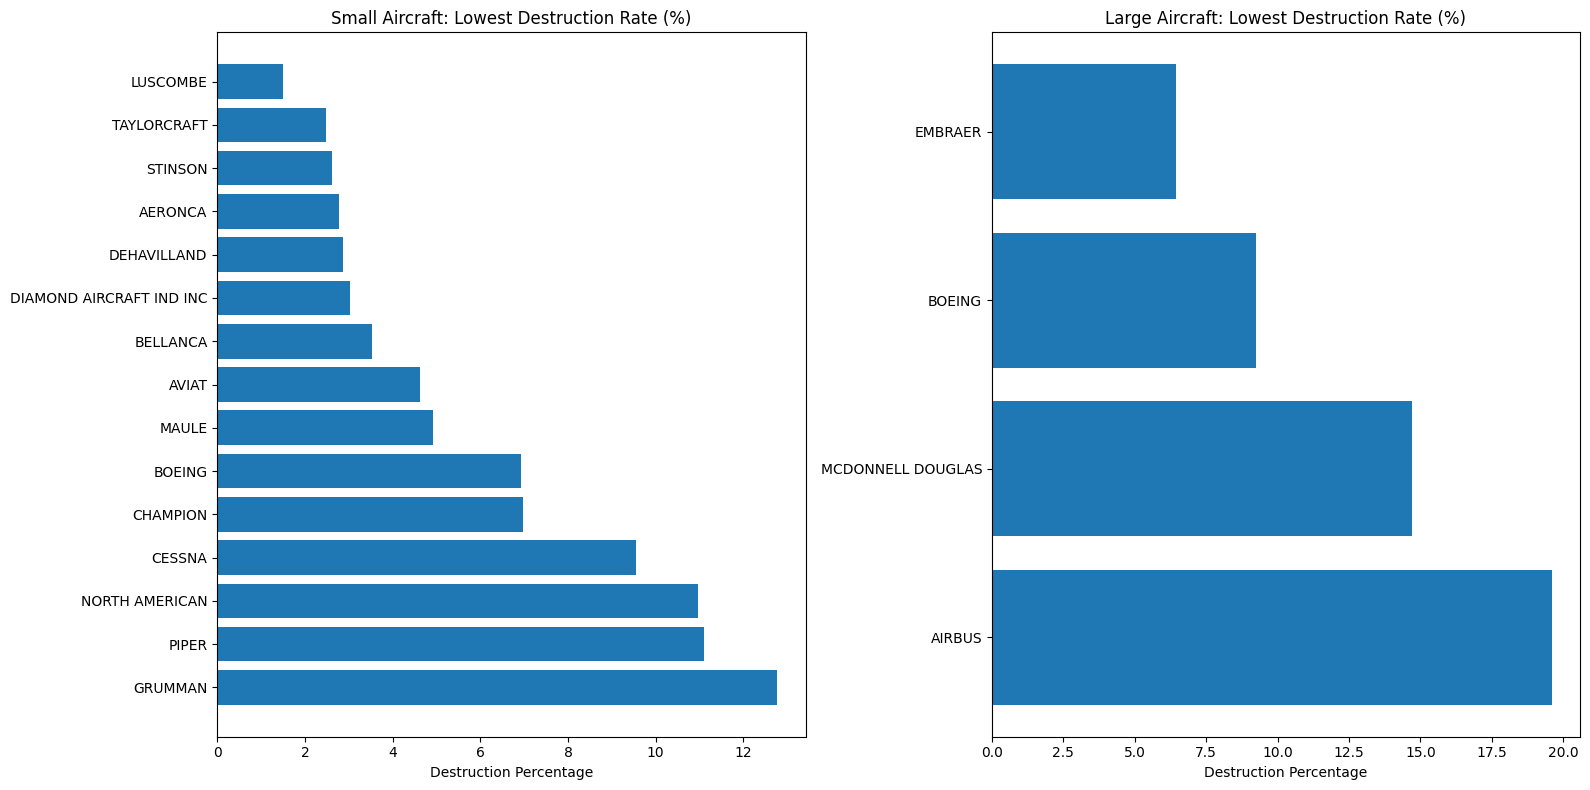

In [21]:
destruction_summary = (
    df.groupby(["Aircraft.Size", "Make"])
      .agg(
          Accidents=("Destroyed.Flag", "count"),
          Destruction_Rate=("Destroyed.Flag", "mean")
      )
      .reset_index()
)

small_destruction = destruction_summary[
    (destruction_summary["Aircraft.Size"] == "Small") &
    (destruction_summary["Accidents"] >= 50)
]

large_destruction = destruction_summary[
    (destruction_summary["Aircraft.Size"] == "Large") &
    (destruction_summary["Accidents"] >= 10)
]

top15_small_destruction = small_destruction.nsmallest(
    15, "Destruction_Rate"
)

top15_large_destruction = large_destruction.nsmallest(
    15, "Destruction_Rate"
)

top15_small_destruction = top15_small_destruction.sort_values(
    "Destruction_Rate"
)

top15_large_destruction = top15_large_destruction.sort_values(
    "Destruction_Rate"
)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Small aircraft
axes[0].barh(
    top15_small_destruction["Make"],
    top15_small_destruction["Destruction_Rate"] * 100
)
axes[0].set_title("Small Aircraft: Lowest Destruction Rate (%)")
axes[0].invert_yaxis()
axes[0].set_xlabel("Destruction Percentage")

# Large aircraft
axes[1].barh(
    top15_large_destruction["Make"],
    top15_large_destruction["Destruction_Rate"] * 100
)
axes[1].set_title("Large Aircraft: Lowest Destruction Rate (%)")
axes[1].invert_yaxis()
axes[1].set_xlabel("Destruction Percentage")

plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

SMALL AIRCRAFT MAKES:
***Grumman*** has the highest destruction rate among the top 10 small aircraft makes with the lowest destruction rate.
It also does not make the top 10 lowest serious injury/fatality rate. This means while it barely makes it into the a low destruction rate category it also is a more frequently dangerous aircraft for passenger in the event of an incident.  

While generally a higher destruction rate indicates more severe injuries and lethal outcomes for passengers in the event of a crash, Cessna goes against this. While it is 12th lowest destruction rate of the top 15 lowest makes it also is one of the safer makes in the event of a crash. On average it has less lethal/serious outcomes for passengers.

That being said, small aircraft typically have comparable lethal/serious outcomes for passengers. Largely most small air craft makes have a high liklelyhood of as much as a 25% chance of severe/to lethal injuries

***LARGE AIRCRAFT MAKES***
Large aircraft tend to have fewer incidents than small aircraft. However, when there are incidents/accidents they have a slightlhy higher on average destruction rate than small aircraft. Regardless of destruction rate large aircraft have a much lower rate of fatalties and severe injuries. Boeing and Airbus however, has the highest occurences of severe and lethal injuries for passengers. However, the majority of their accidents resulted in serious injury and fatalty rates about or below 10%. 

Large aircraft are by and large much safer than small aircraft in the event of a crash or incident

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

/var/folders/lv/pl550ttn68x2d4_h9mk9y7pc0000gn/T/ipykernel_53495/894234667.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


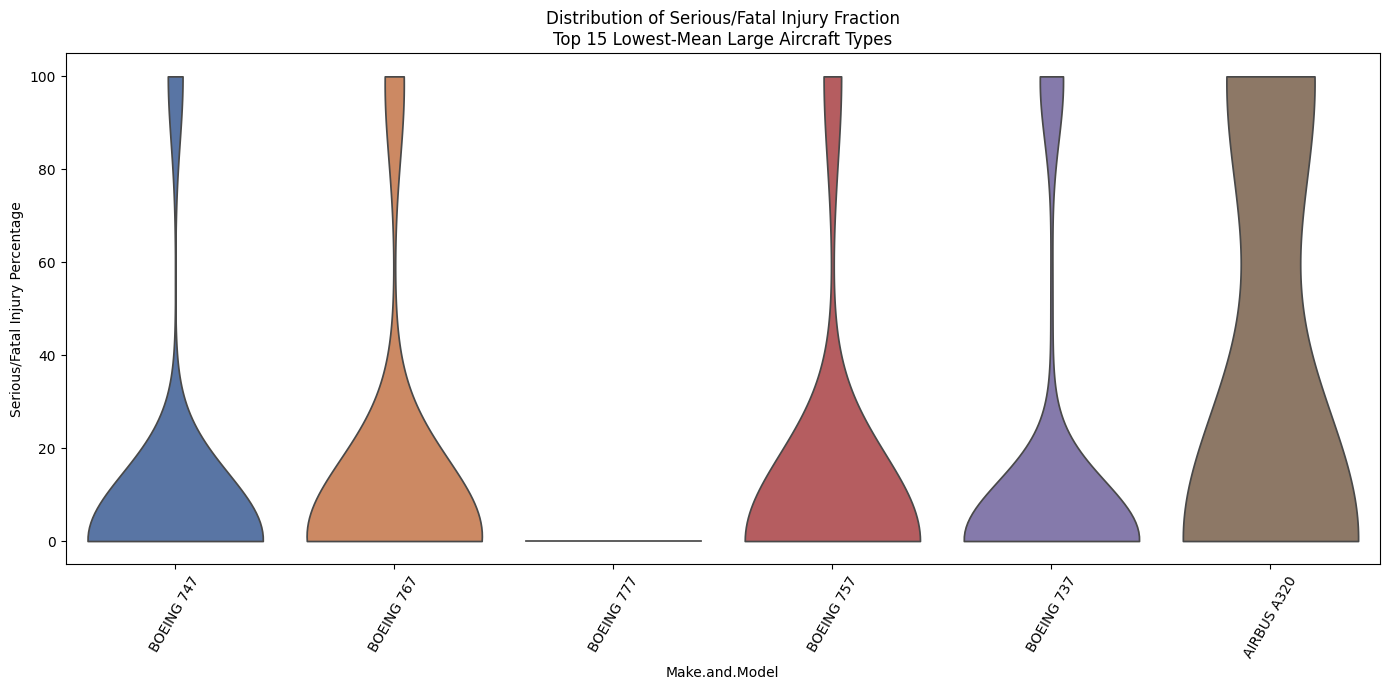

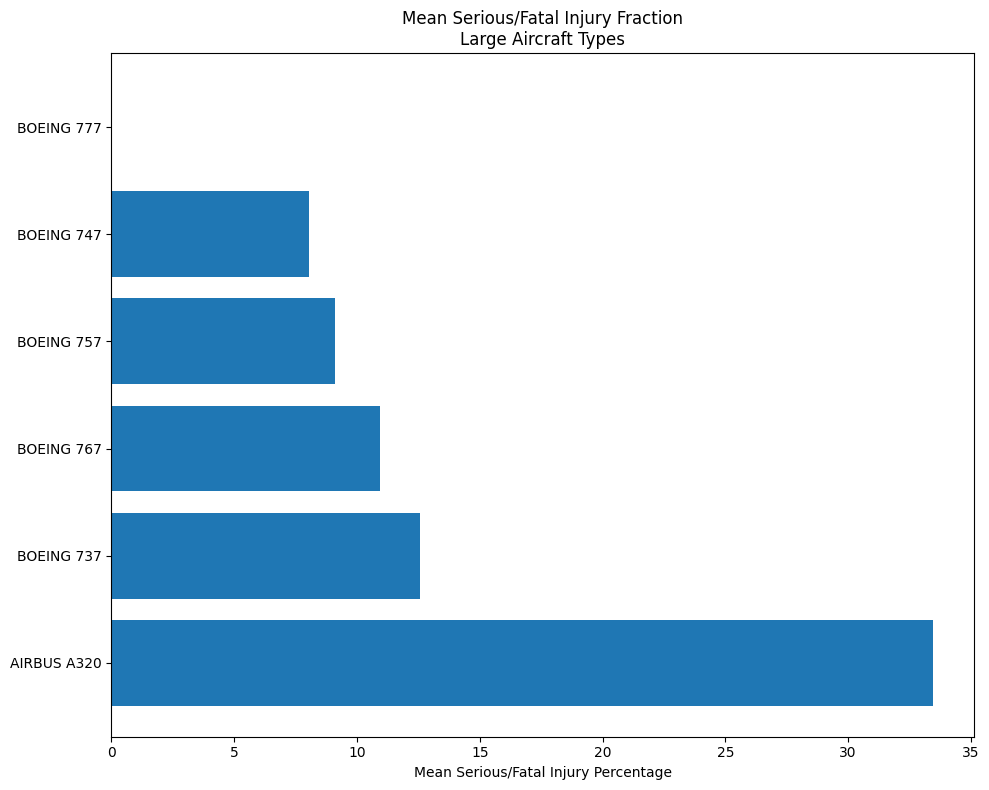

In [28]:
large_df = df[df["Aircraft.Size"] == "Large"].copy()
type_counts = large_df["Make.and.Model"].value_counts()

valid_large_types = type_counts[type_counts >= 10].index

large_df = large_df[
    large_df["Make.and.Model"].isin(valid_large_types)
].copy()
large_type_summary = (
    large_df.groupby("Make.and.Model")
            .agg(
                Accidents=("Serious.Fatal.Rate", "count"),
                Mean_SeriousFatal_Rate=("Serious.Fatal.Rate", "mean")
            )
            .reset_index()
            .sort_values("Mean_SeriousFatal_Rate")
)

top15_large_types = (
    large_type_summary
    .nsmallest(15, "Mean_SeriousFatal_Rate")["Make.and.Model"]
)
plot_df = large_df[
    large_df["Make.and.Model"].isin(top15_large_types)
].copy()

plt.figure(figsize=(14, 7))

sns.violinplot(
    data=plot_df,
    x="Make.and.Model",
    y=plot_df["Serious.Fatal.Rate"] * 100,
    palette="deep",
    cut=0,
    inner=None
)
plt.xticks(rotation=60)
plt.ylabel("Serious/Fatal Injury Percentage")
plt.title("Distribution of Serious/Fatal Injury Fraction\nTop 15 Lowest-Mean Large Aircraft Types")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

plt.barh(
    large_type_summary["Make.and.Model"],
    large_type_summary["Mean_SeriousFatal_Rate"] * 100
)

plt.xlabel("Mean Serious/Fatal Injury Percentage")
plt.title("Mean Serious/Fatal Injury Fraction\nLarge Aircraft Types")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

/var/folders/lv/pl550ttn68x2d4_h9mk9y7pc0000gn/T/ipykernel_53495/3237561203.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


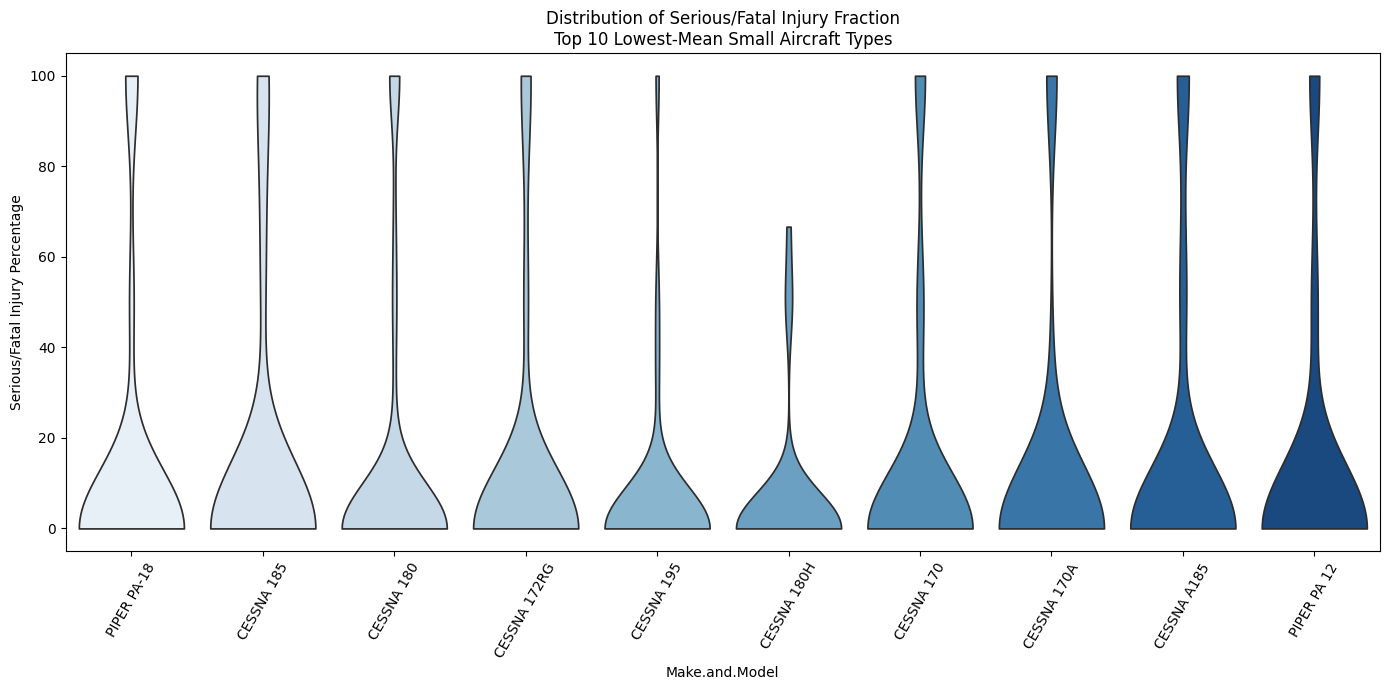

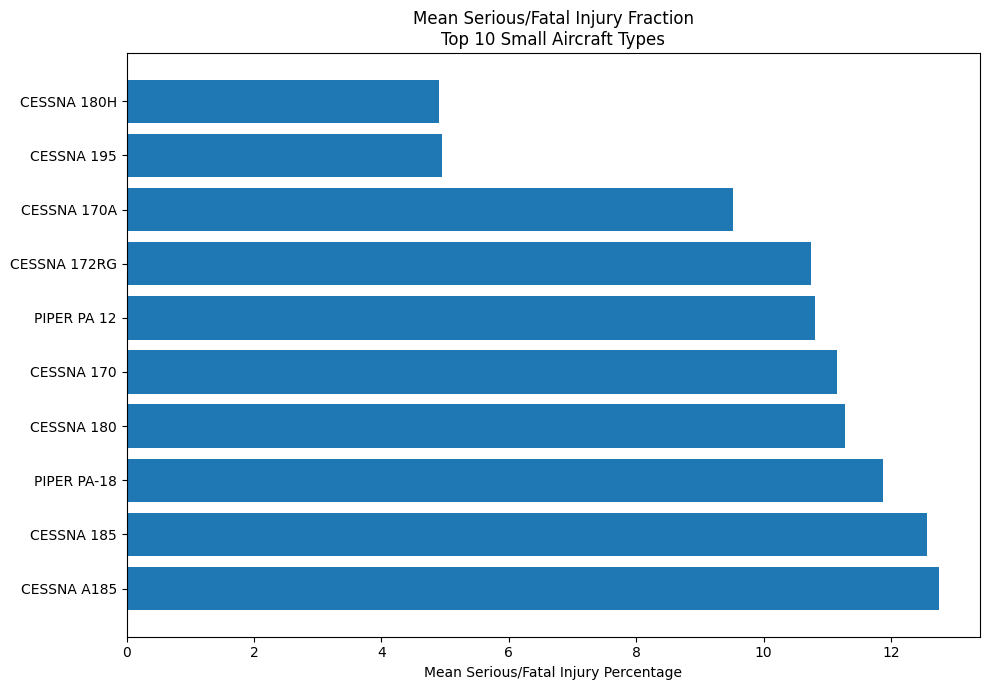

In [33]:
# Filter to small aircraft
small_df = df[df["Aircraft.Size"] == "Small"].copy()

# Ensure minimum sample size per type
type_counts = small_df["Make.and.Model"].value_counts()
valid_small_types = type_counts[type_counts >= 30].index

small_df = small_df[
    small_df["Make.and.Model"].isin(valid_small_types)
].copy()


small_type_summary = (
    small_df.groupby("Make.and.Model")
            .agg(
                Accidents=("Serious.Fatal.Rate", "count"),
                Mean_SeriousFatal_Rate=("Serious.Fatal.Rate", "mean")
            )
            .reset_index()
            .sort_values("Mean_SeriousFatal_Rate")
)


top10_small_types = (
    small_type_summary
    .nsmallest(10, "Mean_SeriousFatal_Rate")["Make.and.Model"]
)


plot_df = small_df[
    small_df["Make.and.Model"].isin(top10_small_types)
].copy()

plt.figure(figsize=(14, 7))

sns.violinplot(
    data=plot_df,
    x="Make.and.Model",
    y=plot_df["Serious.Fatal.Rate"] * 100,
    palette="Blues",
    cut=0,
    inner=None
)

plt.xticks(rotation=60)
plt.ylabel("Serious/Fatal Injury Percentage")
plt.title("Distribution of Serious/Fatal Injury Fraction\nTop 10 Lowest-Mean Small Aircraft Types")

plt.tight_layout()
plt.show()

top10_small_summary = (
    small_type_summary
        .nsmallest(10, "Mean_SeriousFatal_Rate")
        .sort_values("Mean_SeriousFatal_Rate")
)

plt.figure(figsize=(10, 7))

plt.barh(
    top10_small_summary["Make.and.Model"],
    top10_small_summary["Mean_SeriousFatal_Rate"] * 100
)

plt.xlabel("Mean Serious/Fatal Injury Percentage")
plt.title("Mean Serious/Fatal Injury Fraction\nTop 10 Small Aircraft Types")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

For large airplanes we can see that most accidents do not result in serious/fatal injuries. Serious and fatal injuries do happen but, they are much more rare. Boeings typically are very safe with their models being in the 8 to 13% range of severe/fatal injuries

for small airplanes they are much more likely to have incidents that result in serious/fatal injuries. Compared to large aircrafts they have a higher variability in crashes resulting in severe/fatal injuries. They more frequently have an an severe/fatal injury rate that is not zero.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

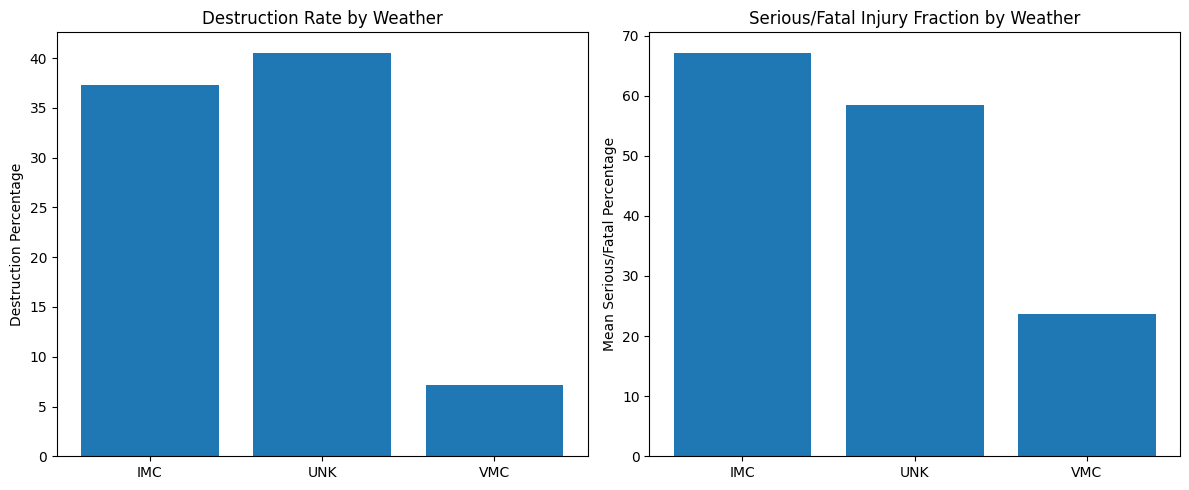

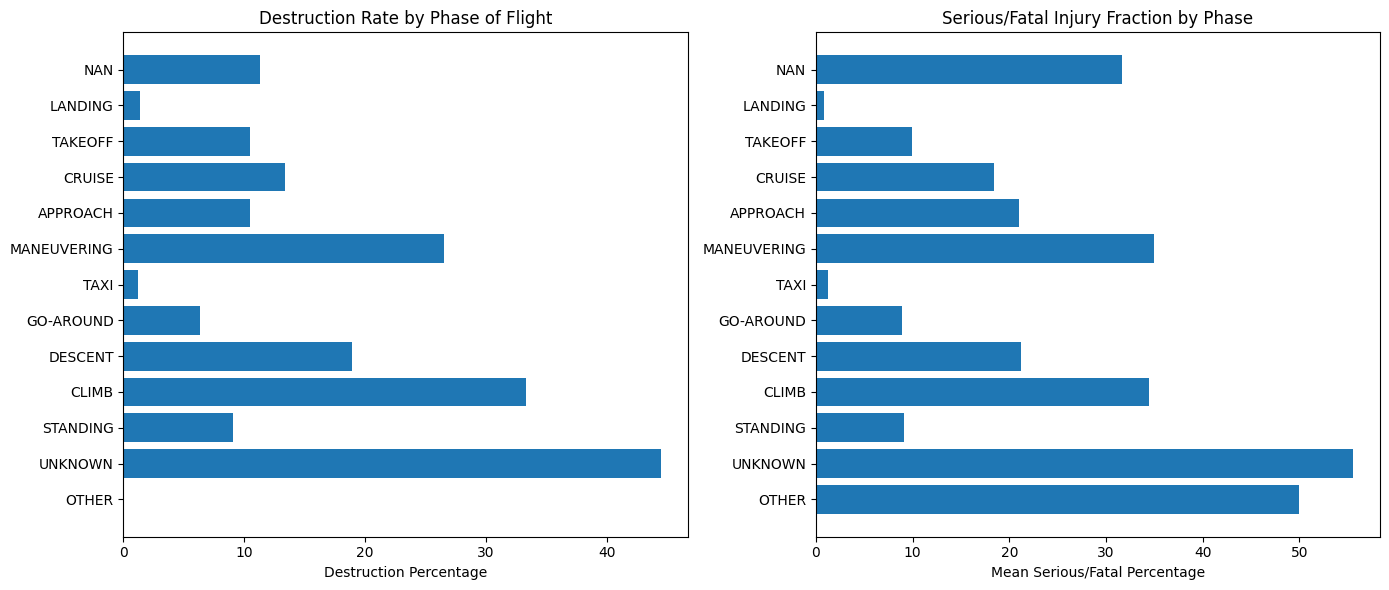

In [34]:
weather_summary = (
    df.groupby("Weather.Condition")
      .agg(
          Accidents=("Destroyed.Flag", "count"),
          Destruction_Rate=("Destroyed.Flag", "mean"),
          Mean_SeriousFatal_Rate=("Serious.Fatal.Rate", "mean")
      )
      .reset_index()
)

weather_summary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Destruction Rate
axes[0].bar(
    weather_summary["Weather.Condition"],
    weather_summary["Destruction_Rate"] * 100
)
axes[0].set_title("Destruction Rate by Weather")
axes[0].set_ylabel("Destruction Percentage")

# Injury Fraction
axes[1].bar(
    weather_summary["Weather.Condition"],
    weather_summary["Mean_SeriousFatal_Rate"] * 100
)
axes[1].set_title("Serious/Fatal Injury Fraction by Weather")
axes[1].set_ylabel("Mean Serious/Fatal Percentage")

plt.tight_layout()
plt.show()

phase_summary = (
    df.groupby("Broad.phase.of.flight")
      .agg(
          Accidents=("Destroyed.Flag", "count"),
          Destruction_Rate=("Destroyed.Flag", "mean"),
          Mean_SeriousFatal_Rate=("Serious.Fatal.Rate", "mean")
      )
      .reset_index()
      .sort_values("Accidents", ascending=False)
)

phase_summary

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Destruction Rate
axes[0].barh(
    phase_summary["Broad.phase.of.flight"],
    phase_summary["Destruction_Rate"] * 100
)
axes[0].set_title("Destruction Rate by Phase of Flight")
axes[0].set_xlabel("Destruction Percentage")
axes[0].invert_yaxis()

# Injury Fraction
axes[1].barh(
    phase_summary["Broad.phase.of.flight"],
    phase_summary["Mean_SeriousFatal_Rate"] * 100
)
axes[1].set_title("Serious/Fatal Injury Fraction by Phase")
axes[1].set_xlabel("Mean Serious/Fatal Percentage")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### WEATHER'S EFFECT
IMC - Pilots need to operate the aircraft by instrument only due to poor visual conditions from weather
VMC - Pilots operate the aircraft from visuals outside of the cockpit; weather is good with good visibility
UNK - Unknown

Incidents with poor weather had a significant destruction rate over 35%. Conversely incidents with good weather had a much lower destruction rate, below 10%. Of those incidents with poor weather they had an average serious injury/fatality rate of near 70%

### Phase of flight effect
Two stand out phases have a high impact on destruction and sersious/fatal injury, Maneuvering and Climb. Both phases have around 30% destruction rates, and both have about 35% serious/fatal injury rates.